In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### Кластеризация k-means

k-means - один из алгоритмов вероятностного подхода

In [2]:
from sklearn.cluster import KMeans

In [3]:
model = KMeans(n_clusters=3, random_state=100)

#### Функция для создания учебного датасета
Признаки рыб, обитающих в озере

In [4]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array(
        [[3, 3], [6, 9], [9, 3]]
    )
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [21]:
train = make_data(10, 42)
test = make_data(10, 27)

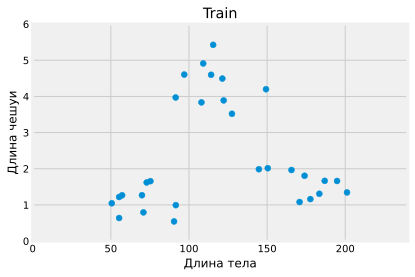

In [22]:
plt.scatter(train['x'], train['y'])

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns= ['x', 'y'])

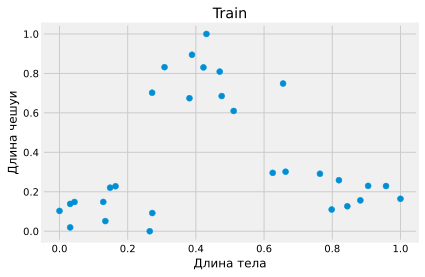

In [10]:
plt.scatter(train_scaled['x'], train_scaled['y'])

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

#### Построение модели кластеризации

In [11]:
train_labels = model.fit_predict(train_scaled)
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1])

#### Центры кластеров

In [12]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

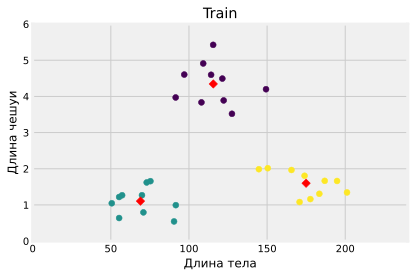

In [13]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

#### Inertia

Сумма квадратов расстояний от объектов до центров их кластеров.

Чем она меньше, тем лучше разбиение на кластеры.
Равна нулю, если кластеров столько же сколько и объектов.

In [14]:
model.inertia_

0.5417377477488049

In [15]:
inertia_arr = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)


2.9002641632095463
0.5417377477488049
0.4281736891174851
0.3258659915567972
0.26736166193637667
0.2072579445597765
0.16774172223409062
0.1467127247607685


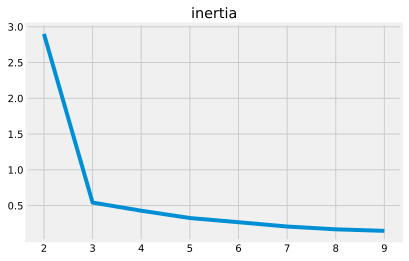

In [16]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('inertia')
plt.show()

#### Отнесение примеров из тестового датасета к определенному кластеру

In [17]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [18]:
test_labels = model.predict(test_scaled)

In [19]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2])

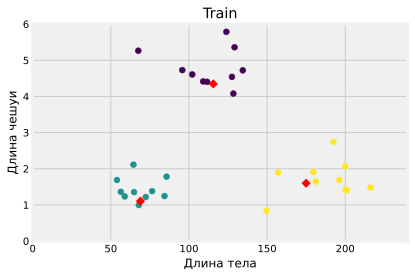

In [23]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

plt.show()

#### AgglomerativeClustering

### Агломеративная кластеризация

Перейдём к _иерархической кластеризации_, которая в свою очередь состоит из _агломеративной_ и _дивизивной_ кластеризации.

Алгоритмы _агломеративной_ кластеризации основаны на объединении мелких кластеров в более крупные. На начальной итерации каждый объект считается отдельным кластером, затем происходит их последовательное объединение. Напротив, _дивизивная_ кластеризация - это обратный процесс: сначала вся выборка считается одним большим кластером, затем происходит последовательное разбиение кластеров на части.

In [24]:
from sklearn.cluster import AgglomerativeClustering

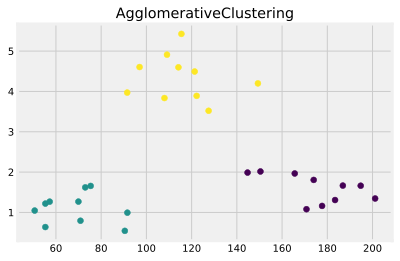

In [25]:
model = AgglomerativeClustering(n_clusters=3)
train_labels = model.fit_predict(train_scaled)

plt.scatter(train['x'], train['y'], c=train_labels)
plt.title('AgglomerativeClustering')
plt.show()

Отметим, что у модели `AgglomerativeClustering` нет метода `.predict`. Поэтому чтобы предсказать разбиение на кластеры для тестовых данных, воспользуемся уже известным нам алгоритмом KNN. Будем использовать полученные только что метки классов `train_labels` для того, чтобы превратить нашу задачу в задачу обучения с учителем.

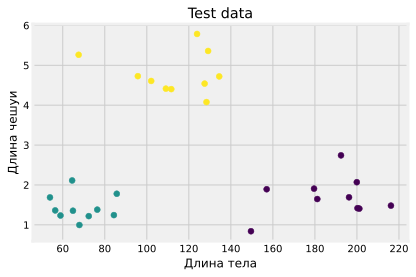

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_labels)

test_labels = knn.predict(test_scaled)

plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test data')
plt.show()